 # SHANDO ALGORITHMS

## OUR DATA PIPELINE

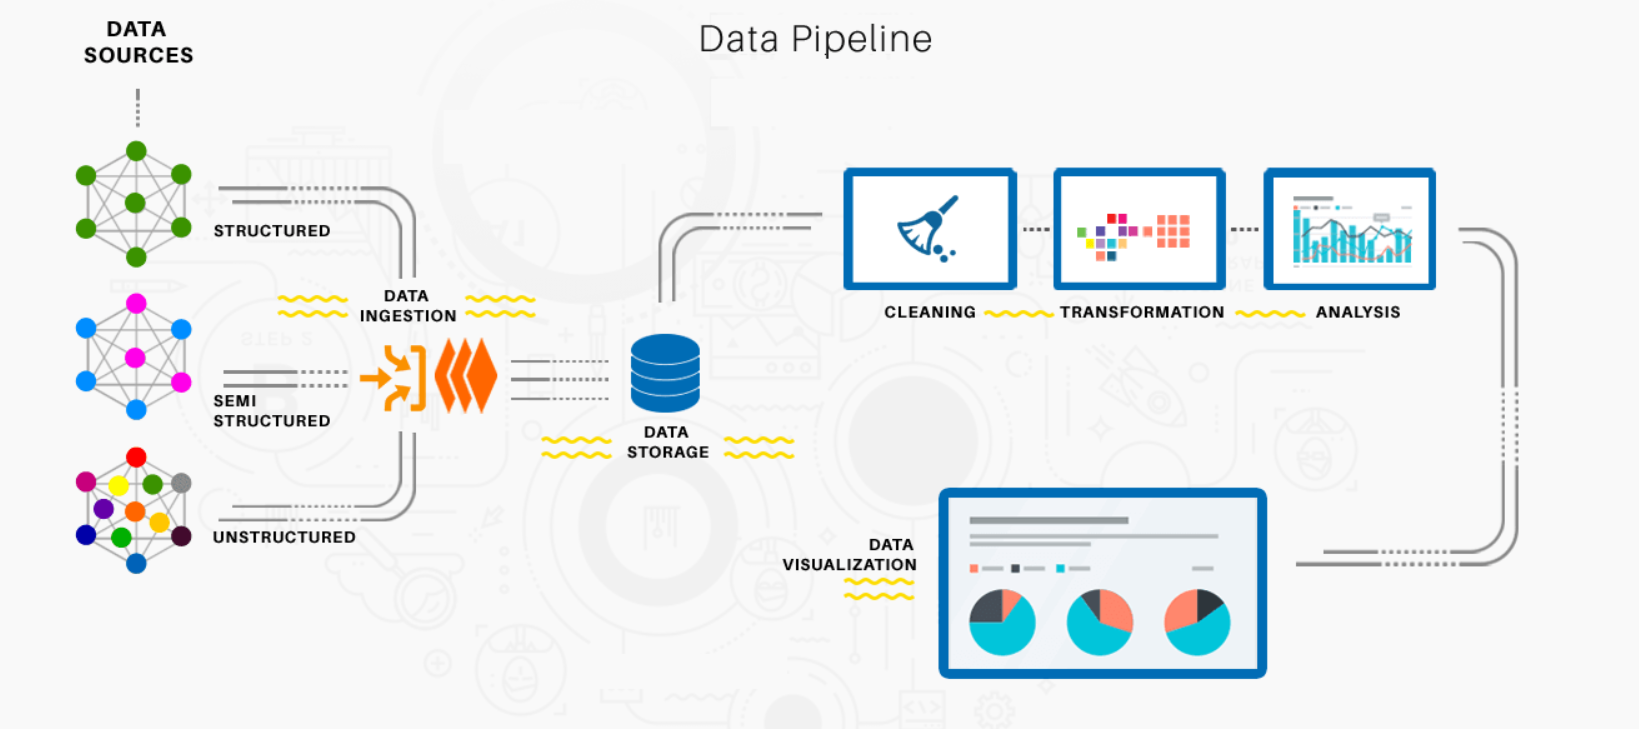

# Importing Libraries

In [151]:
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import operator
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pydotplus
import numpy as np
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Loading Data

In [152]:
data=pd.read_excel('excel.xlsx')

In [153]:
data.shape

(996, 15)

In [154]:
data.head(5)

,S.No,PRO_ID,COST OF PRODUCTION,SELLING PRICE,SP_Quality,PROFIT(%),Quantity,SOLDUNIT,Date of manufacture,Date of OutStanding,Remaining unit initial,Remaining unit after 20 days of Outstanding,Remaining unit after 40 days of Outstanding,Possible Option,Location
0,1,DEMOD2,30299,38097.0,3,20.0,250,183,21-06-2018,140,67,47,37,NaN,Delhi-3
1,2,DEMOD4,18990,22881.0,3,17.0,540,354,20-04-2018,202,186,120,110,NaN,Bangalore-2
2,3,DEMOD6,63450,67312.0,2,5.0,99,83,28-02-2018,253,16,15,12,NaN,Kolkata
3,4,DEMOD8,24990,32607.0,3,23.0,266,150,24-03-2018,229,116,112,101,NaN,Mumbai-2
4,6,DEMOD12,50000,55000.0,2,9.0,268,200,14-07-2018,117,68,52,43,NaN,Kolkata


In [155]:
data.describe()

,S.No,COST OF PRODUCTION,SELLING PRICE,SP_Quality,PROFIT(%),Quantity,SOLDUNIT,Date of OutStanding,Remaining unit initial,Remaining unit after 20 days of Outstanding,Remaining unit after 40 days of Outstanding,Possible Option
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,0.0
mean,501.472892,77625.042169,89051.922892,1.760040,15.278133,244.829317,124.707831,568.849398,120.121486,61.199799,30.924699,NaN
std,287.711208,48716.771314,55584.468110,0.863352,8.816918,144.260683,110.523623,273.378000,110.093119,70.151274,42.795145,NaN
min,1.000000,12428.000000,13920.000000,1.000000,0.020000,1.000000,0.000000,91.000000,1.000000,0.000000,0.000000,NaN
25%,252.750000,41412.250000,47920.000000,1.000000,7.000000,120.000000,34.000000,315.750000,33.000000,10.750000,4.000000,NaN
50%,501.500000,68033.000000,76800.000000,1.000000,15.000000,246.000000,91.500000,573.500000,87.000000,35.000000,13.000000,NaN
75%,750.250000,101397.000000,118022.200000,3.000000,23.000000,369.250000,191.000000,798.250000,176.000000,88.000000,40.000000,NaN
max,999.000000,373257.000000,439920.000000,3.000000,30.000000,588.000000,509.000000,1045.000000,483.000000,400.000000,333.000000,NaN


In [156]:
dummy=data

In [157]:
dummy['Date of OutStanding'][0]

140

In [158]:
def Y_TrainMaking(dummy):
    for i in range(0,len(dummy)):
        if(dummy['Date of OutStanding'][i]<90):
            dummy.drop(i,axis = 0,inplace = True)
        #for statement-2
        if(dummy['Date of OutStanding'][i]>=90 and dummy['Date of OutStanding'][i]<=150):
            if(((dummy['    SOLDUNIT'][i]*dummy['   SELLING PRICE'][i])-(dummy['COST OF PRODUCTION'][i]*dummy['Quantity'][i]))>0):
                # deciding threshold
                if(((dummy['Remaining unit initial'][i]-dummy['   Remaining unit after 20 days of Outstanding'][i])/(dummy['Remaining unit initial'][i]))*100 >25):
                    dummy['Possible Option'][i]=0
                else:
                     dummy['Possible Option'][i]=2
            else:
                dummy['Possible Option'][i]=2


        #for statement-1 and 2
        elif(dummy['Date of OutStanding'][i]>150 and dummy['Date of OutStanding'][i]<=365):
            
            if(((dummy['    SOLDUNIT'][i]*dummy['   SELLING PRICE'][i])-(dummy['COST OF PRODUCTION'][i]*dummy['Quantity'][i]))>0):
                if(((dummy['Remaining unit initial'][i]-dummy['   Remaining unit after 20 days of Outstanding'][i])/(dummy['Remaining unit initial'][i]))*100 >31):
                    dummy['Possible Option'][i]=0
                else:
                    dummy['Possible Option'][i]=2
            else:
                #now we offer a discount recommondation for next 20 days
                Discount=0
                if dummy['PROFIT(%)'][i]>20:
                     Discount=dummy['PROFIT(%)'][i]-10
                elif dummy['PROFIT(%)'][i]>10 and dummy['PROFIT(%)'][i]<20:
                     Discount=dummy['PROFIT(%)'][i]-5
                elif dummy['PROFIT(%)'][i]>3 and dummy['PROFIT(%)'][i]<10:
                     Discount=dummy['PROFIT(%)'][i]-3
                else:
                     Discount=0
                
                #now checking the stock
                if(((dummy['   Remaining unit after 20 days of Outstanding'][i]-dummy['      Remaining unit after 40 days of Outstanding']).any()/(dummy['   Remaining unit after 20 days of Outstanding'][i]))*100 >10):
                    dummy['Possible Option'][i]=0
                else:
                    dummy['Possible Option'][i]=1
                    
        #for statement-3
        elif(dummy['Date of OutStanding'][i]>365 and dummy['Date of OutStanding'][i]<=600 ):
            dummy['Possible Option'][i]=3
        #for statement-4
        elif(dummy['Date of OutStanding'][i]>600 and dummy['Date of OutStanding'][i]<=900 ):
            dummy['Possible Option'][i]=4
        #for statement-5
        else:
            dummy['Possible Option'][i]=5

# Interpretation Of Output :-
## 0 indicates Wait for some more days, this will clear out inventory. 
## 1 indicates Move to another 3PL.
## 2 indicates Sell the inventory to GDO sale(Global Dell Outlet)
## 3 indicates Social network inputs to find the right customer for these aging inventory.
## 4 indicates we need to open new warehouses in tier-2/ tier-3 cities.
## 5 indicates we need to collaborate with government to ensure that no product will remain in inventory and will increase the good will.

In [159]:
Y_TrainMaking(dummy)

In [160]:
#drop NaN values
dummy.dropna(inplace=True)

In [161]:
dummy.head(5)

,S.No,PRO_ID,COST OF PRODUCTION,SELLING PRICE,SP_Quality,PROFIT(%),Quantity,SOLDUNIT,Date of manufacture,Date of OutStanding,Remaining unit initial,Remaining unit after 20 days of Outstanding,Remaining unit after 40 days of Outstanding,Possible Option,Location
0,1,DEMOD2,30299,38097.0,3,20.0,250,183,21-06-2018,140,67,47,37,2.0,Delhi-3
1,2,DEMOD4,18990,22881.0,3,17.0,540,354,20-04-2018,202,186,120,110,1.0,Bangalore-2
2,3,DEMOD6,63450,67312.0,2,5.0,99,83,28-02-2018,253,16,15,12,1.0,Kolkata
3,4,DEMOD8,24990,32607.0,3,23.0,266,150,24-03-2018,229,116,112,101,1.0,Mumbai-2
4,6,DEMOD12,50000,55000.0,2,9.0,268,200,14-07-2018,117,68,52,43,2.0,Kolkata


In [162]:
#See all the possible values
set(dummy['Possible Option'])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [163]:
#Count the number of occurences of each value
dummy['Possible Option'].value_counts()

4.0    300
3.0    231
1.0    188
5.0    168
0.0     61
2.0     48
Name: Possible Option, dtype: int64

In [164]:
len(dummy)

996

In [165]:
dummy.to_excel('Training.xlsx')

In [166]:
#Reading Training data
Training=pd.read_excel('Training.xlsx')

In [167]:
Training['Date of manufacture'] =pd.to_datetime(Training['Date of manufacture'])
#Sorting the data according to date of manuafacture
Training.sort_values(by='Date of manufacture')
Training.head(5)

,S.No,PRO_ID,COST OF PRODUCTION,SELLING PRICE,SP_Quality,PROFIT(%),Quantity,SOLDUNIT,Date of manufacture,Date of OutStanding,Remaining unit initial,Remaining unit after 20 days of Outstanding,Remaining unit after 40 days of Outstanding,Possible Option,Location
0,1,DEMOD2,30299,38097.0,3,20.0,250,183,2018-06-21,140,67,47,37,2,Delhi-3
1,2,DEMOD4,18990,22881.0,3,17.0,540,354,2018-04-20,202,186,120,110,1,Bangalore-2
2,3,DEMOD6,63450,67312.0,2,5.0,99,83,2018-02-28,253,16,15,12,1,Kolkata
3,4,DEMOD8,24990,32607.0,3,23.0,266,150,2018-03-24,229,116,112,101,1,Mumbai-2
4,6,DEMOD12,50000,55000.0,2,9.0,268,200,2018-07-14,117,68,52,43,2,Kolkata


In [168]:
#Drop Date of manufacture and PRO_ID columns
Training.drop('Date of manufacture',axis = 1,inplace = True)

In [169]:
Training.drop('PRO_ID',axis = 1,inplace = True)

# Exploratory Data Analysis

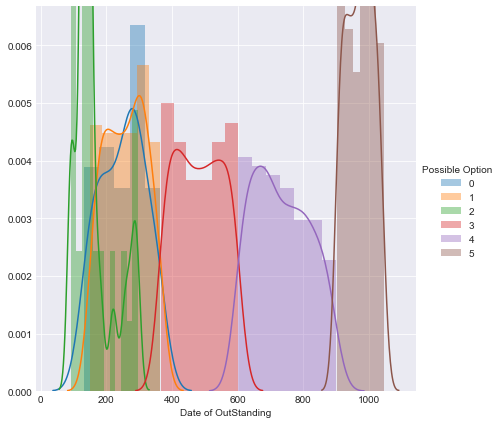

In [170]:
#distribution plot of 'Date of OutStanding' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , 'Date of OutStanding')
g.add_legend()
plt.show()

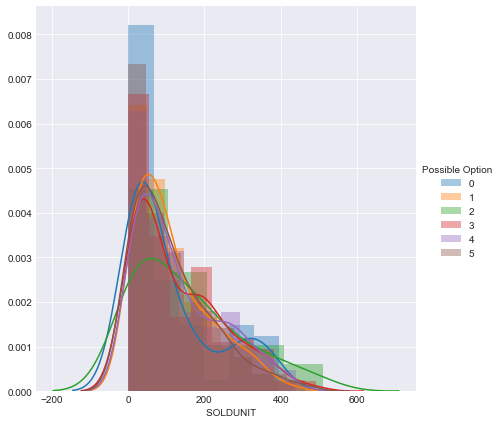

In [171]:
#distribution plot of 'SOLDUNIT' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , '    SOLDUNIT')
g.add_legend()
plt.show()

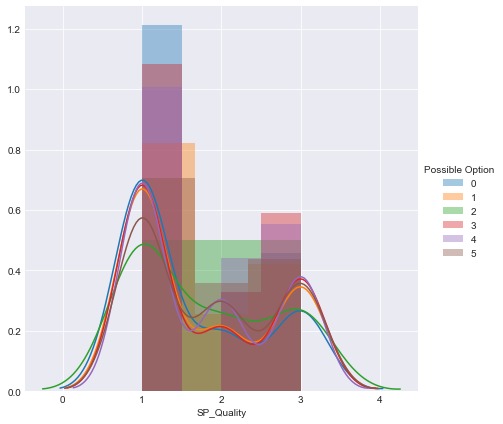

In [172]:
#distribution plot of 'SP_Quality' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , 'SP_Quality')
g.add_legend()
plt.show()

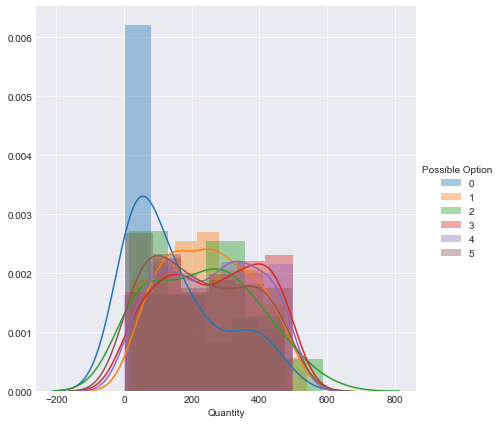

In [173]:
#distribution plot of 'Quantity' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , 'Quantity')
g.add_legend()
plt.show()

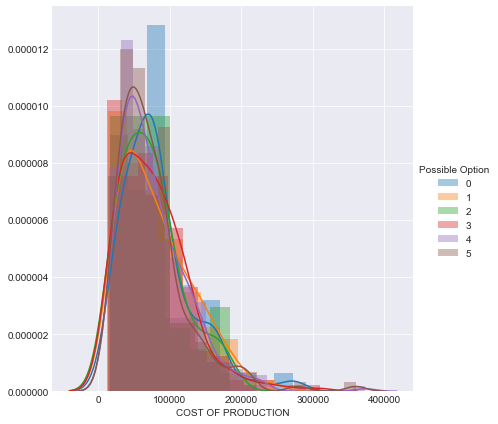

In [174]:
#distribution plot of 'COST OF PRODUCTION' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , 'COST OF PRODUCTION')
g.add_legend()
plt.show()

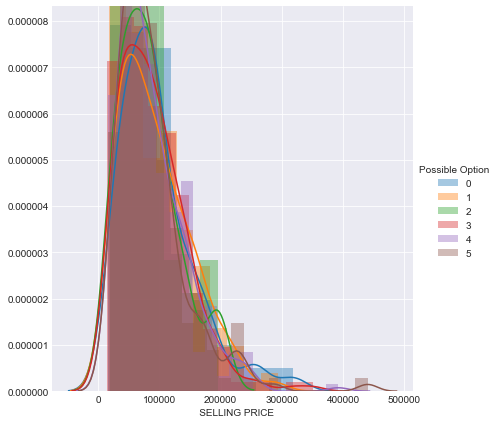

In [175]:
#distribution plot of 'SELLING PRICE' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , '   SELLING PRICE')
g.add_legend()
plt.show()

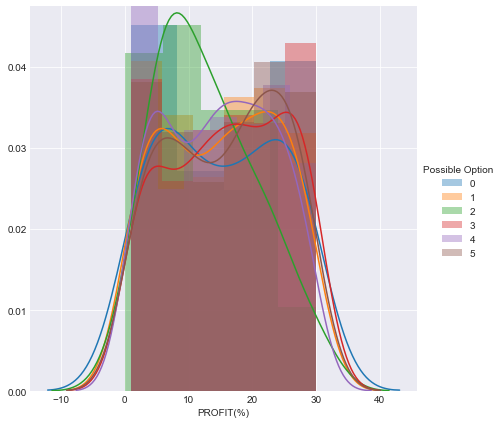

In [176]:
#distribution plot of 'PROFIT' column according to the Possible_Option 
g = sns.FacetGrid(data = Training,hue = 'Possible Option',size = 6)
g.map(sns.distplot , 'PROFIT(%)')
g.add_legend()
plt.show()

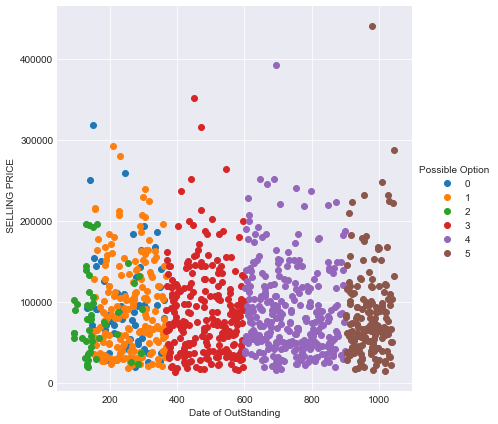

In [177]:
#Scatter plot between 'Date of OutStanding' and 'SELLING PRICE' according to the 'Possible Option' 
sns.set_style('darkgrid')
g = sns.FacetGrid(data = Training, hue = 'Possible Option' , size = 6)
g.map(plt.scatter , 'Date of OutStanding','   SELLING PRICE')
g.add_legend()
plt.show()

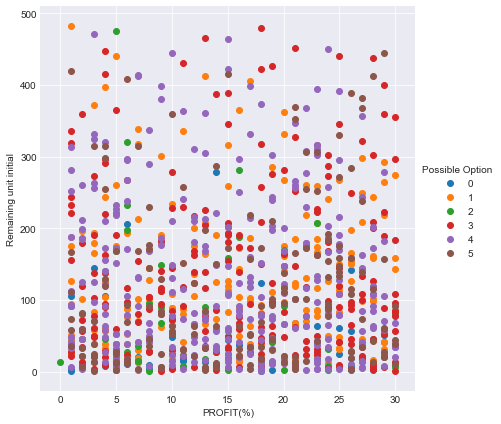

In [178]:
#Scatter plot between 'PROFIT(%)' and 'Remaining unit initial' according to the 'Possible Option'
sns.set_style('darkgrid')
g = sns.FacetGrid(data = Training, hue = 'Possible Option' , size = 6)
g.map(plt.scatter , 'PROFIT(%)','Remaining unit initial')
g.add_legend()
plt.show()

In [179]:
df = Training.drop(['S.No','Quantity','   Remaining unit after 20 days of Outstanding','      Remaining unit after 40 days of Outstanding'],axis = 1)

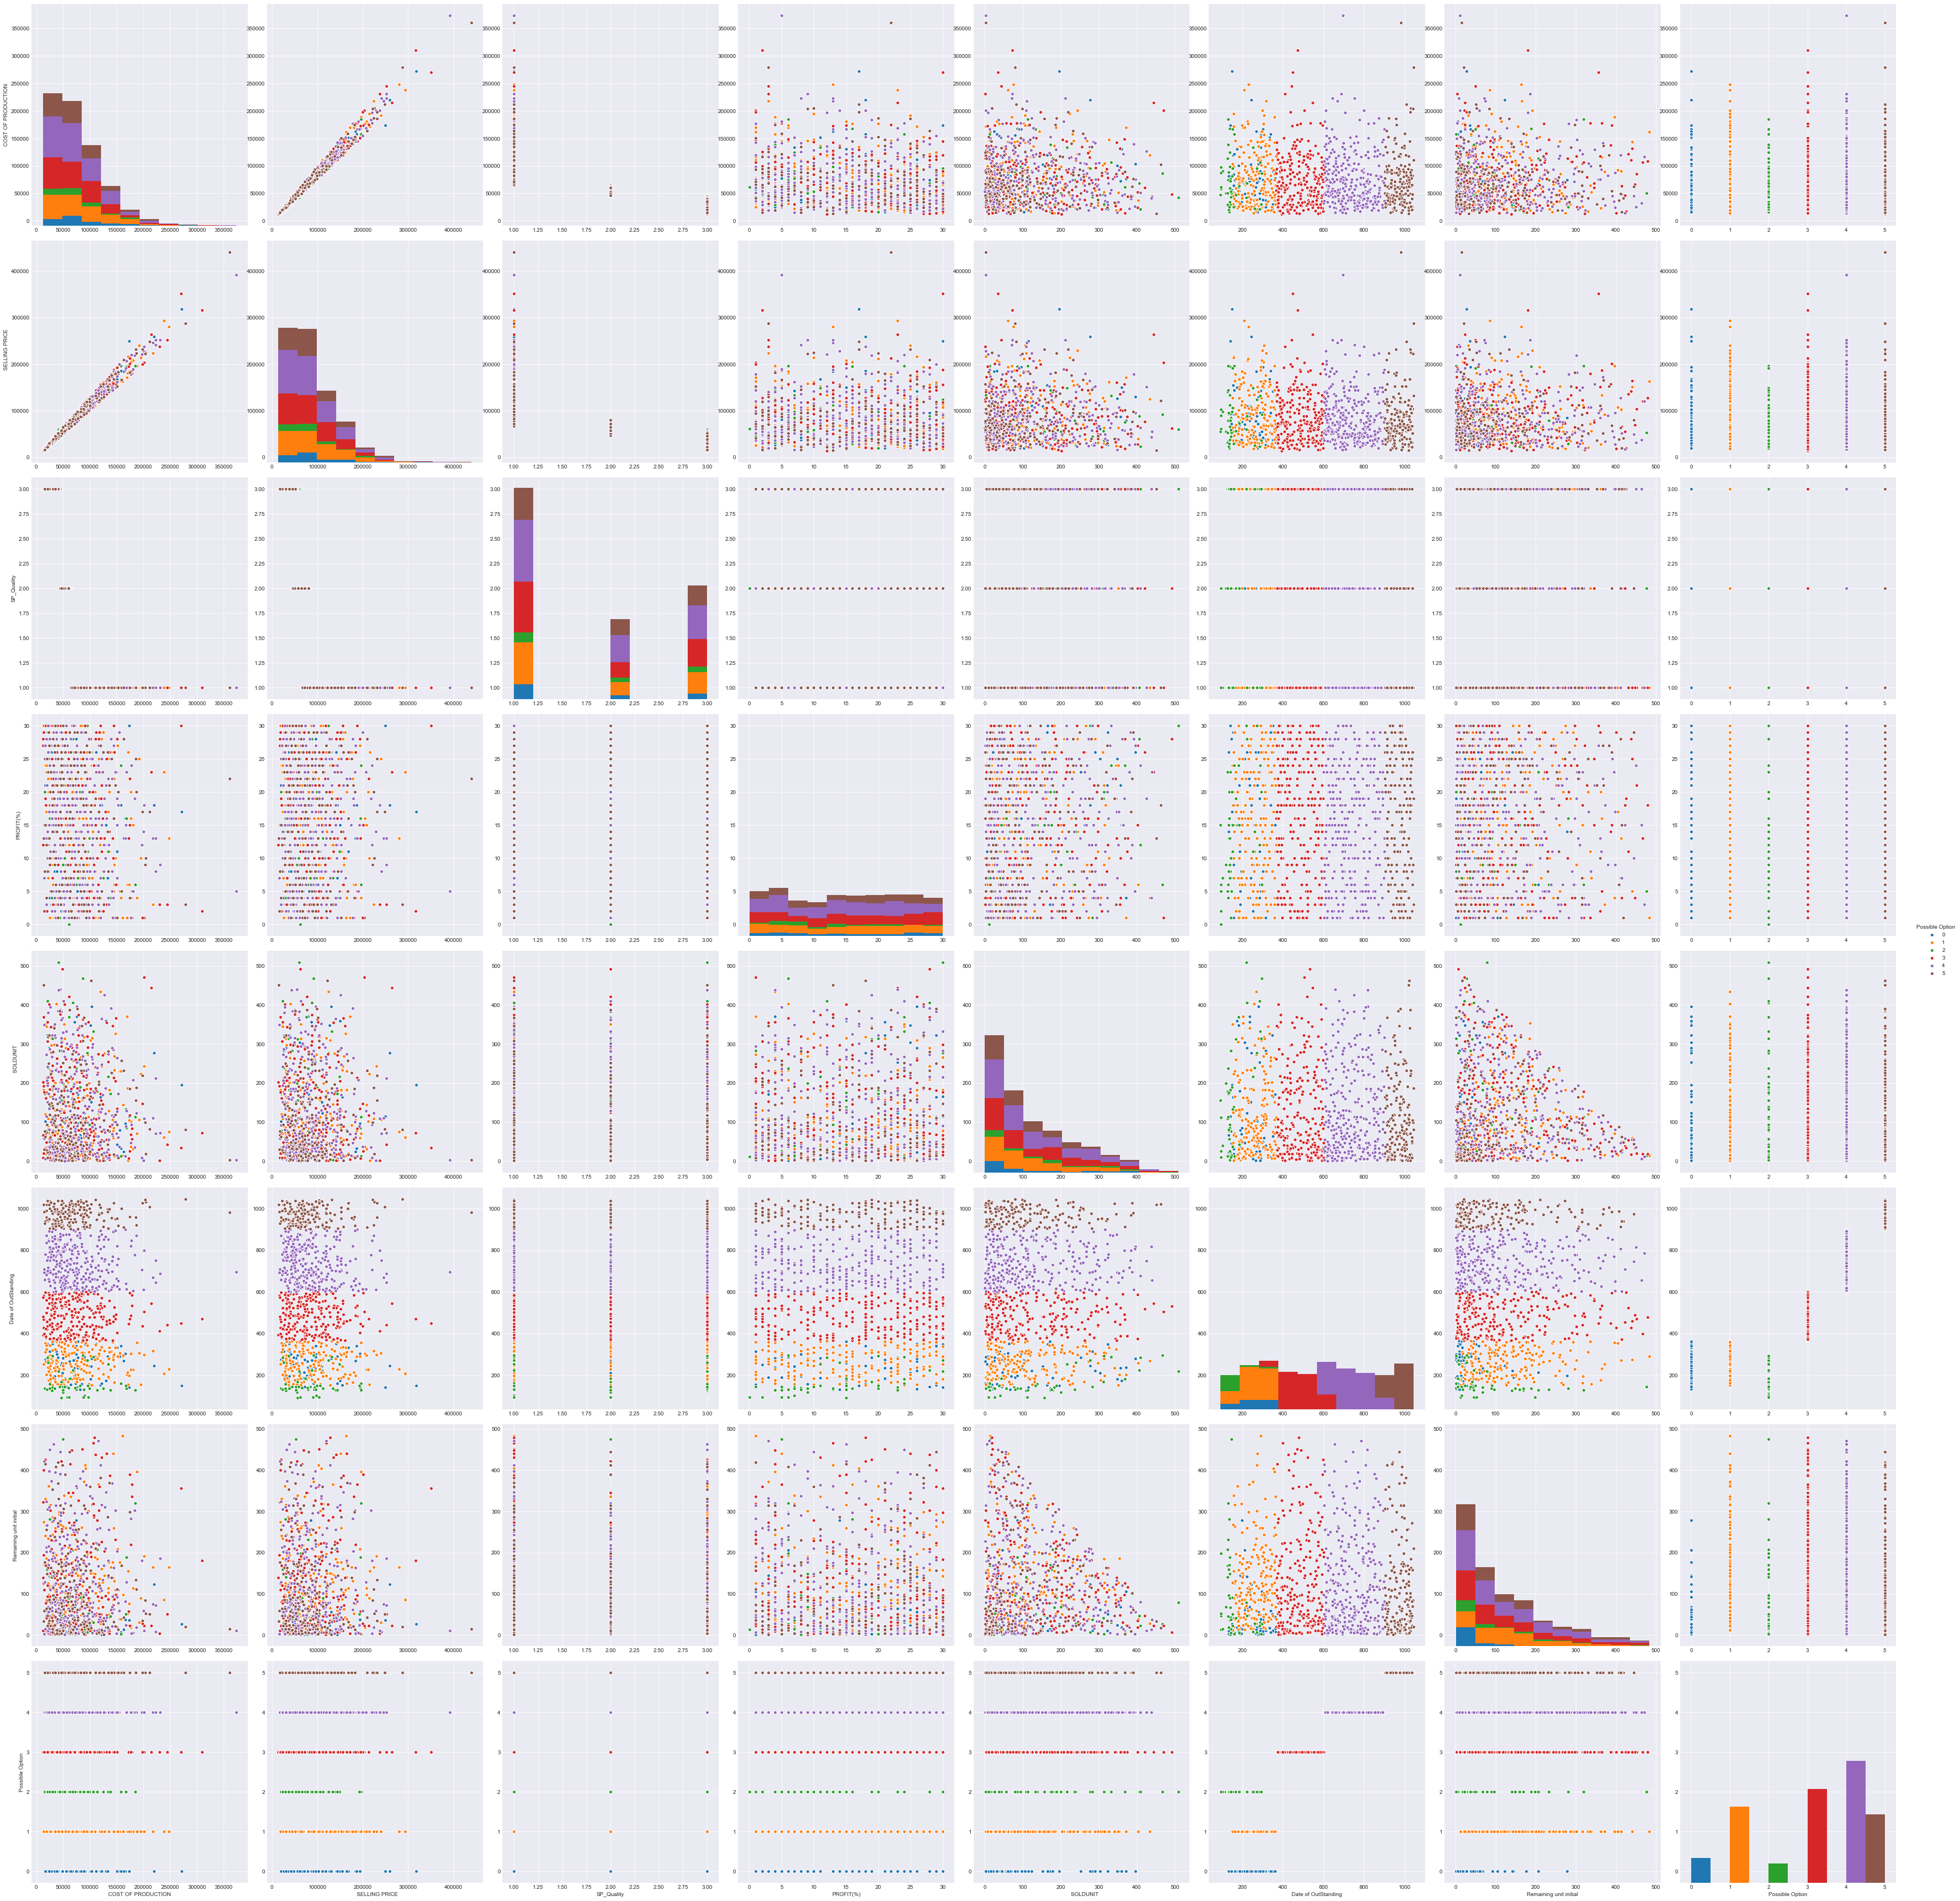

In [180]:
# pair plot between every feature in dataset
plt.close()
sns.set_style('darkgrid')
sns.pairplot(data = df, hue = 'Possible Option' , size  = 6)
plt.show()

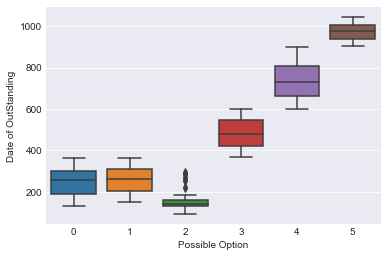

In [181]:
#Box-whisker plot for 'Date of OutStanding'
sns.boxplot(x='Possible Option',y='Date of OutStanding',data= Training)
plt.show()

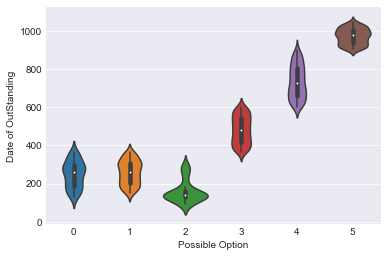

In [182]:
#Violin-Plot for 'Date of OutStanding'
sns.violinplot(x='Possible Option',y='Date of OutStanding',data= Training)
plt.show()

In [183]:
Y=Training['Possible Option']

In [184]:
X=Training.iloc[:,:-1]
X.drop('Possible Option',axis = 1,inplace = True)

In [185]:
X.columns

Index(['S.No', 'COST OF PRODUCTION', '   SELLING PRICE', 'SP_Quality',
       'PROFIT(%)', 'Quantity', '    SOLDUNIT', 'Date of OutStanding',
       'Remaining unit initial',
       '   Remaining unit after 20 days of Outstanding',
       '      Remaining unit after 40 days of Outstanding'],
      dtype='object')

In [186]:
len(X)

996

In [187]:
#splitting the dataset into 70% for train and 30% for the testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=0)

## LOGISTIC REGRESSION

In [188]:
#Evaluating Logistic Regression
clf = LogisticRegression(C = 1)
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
acc = accuracy_score(Y_test,pred)
print('Accuracy in training dataset for Logistic Regression is',clf.score(X_train,Y_train)*100)
print('Accuracy in test dataset for Logistic Regression is',acc*100)

Accuracy in training dataset for Logistic Regression is 61.9799139168
Accuracy in test dataset for Logistic Regression is 53.8461538462


## KNN 

In [189]:
#Evaluating K Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
print('Accuracy in training dataset for KNN is',knn.score(X_train,Y_train)*100)
print('Accuracy in test dataset for KNN is',knn.score(X_test,Y_test)*100)

Accuracy in training dataset for KNN is 34.0028694405
Accuracy in test dataset for KNN is 30.7692307692


## DECISION TREE

In [216]:
#Evaluating Decision Tree
#Testing of Model using exception handling:
if Training['Date of OutStanding'].all()>0 and Training['COST OF PRODUCTION'].all()>0 and Training['   SELLING PRICE'].all()>0 and Training['PROFIT(%)'].all()>0 and Training['Quantity'].all()>0 and Training['SP_Quality'].all()>0:
    clf1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
    clf1.fit(X_train,Y_train)
    pred = clf1.predict(X_test)
    print('Accuracy in training dataset for Decision Tree',clf1.score(X_train,Y_train))
    print('Accuracy in test dataset for Decision Tree',clf1.score(X_test,Y_test))
    dot_data=export_graphviz(clf1,out_file=None,rounded=True,filled=True,leaves_parallel=False)
    graph=pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("Lap.pdf")
else :
    raise RuntimeError('Ummm... something is wrong')


Accuracy in training dataset for Decision Tree 0.886657101865
Accuracy in test dataset for Decision Tree 0.899665551839


# Confusion Matrix as metric

In [191]:
#Function to plot the confusion matrix to evaluate the results from decision tree
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    labels = [0,1,2,3,4,5]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


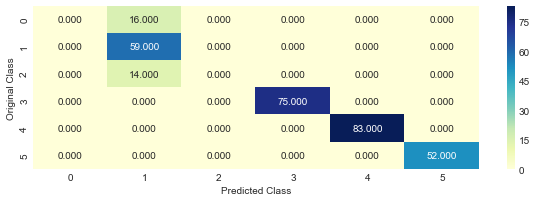

In [192]:
plot_confusion_matrix(Y_test,pred)

# ROC - AUC 

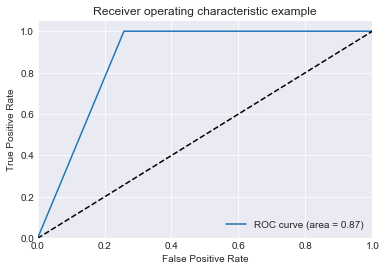

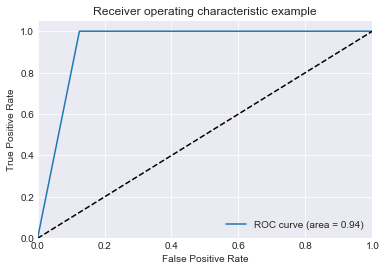

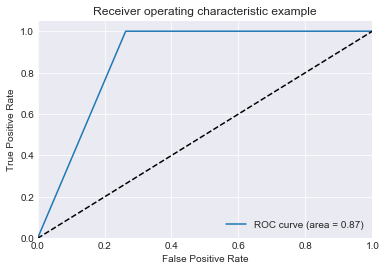

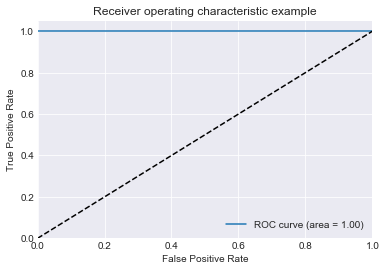

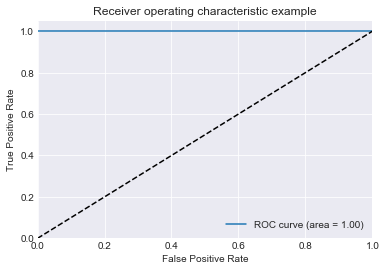

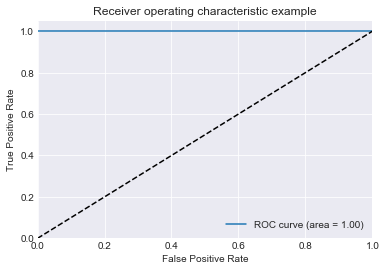

In [193]:
#Plotting ROC_AUC Curves for each class
n_classes = 6
y = label_binarize(Y_test, classes=[0,1,2,3,4,5])
y_score = clf1.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = list()
for i in range(n_classes):
    fpr[i], tpr[i] , _  =  roc_curve(y[:, i], y_score[:, i])
    roc_auc.append(auc(fpr[i], tpr[i]))

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


# Audit Function

In [194]:
#This function gives the context of the item by giving the sugggestions based upon the inventory
lis = []
n = ['Wait for some more days, this will clear out inventory','Move to another 3PL.','Sell the inventory to GDO sale(Global Dell Outlet)','Social network inputs to find the right customer for these aging inventory.','we need to open new warehouses in tier-2/ tier-3 cities.','we need to collaborate with government to ensure that no product will remain in inventory and will increase the good will.']
for i in range(len(pred)):
    lis.append(n[pred[i]])
frame = pd.DataFrame(lis)  

In [195]:
frame.to_excel('OUT.xlsx')

## RANDOM FOREST

In [196]:
#Evaluating Random Forest Classifier
clf=RandomForestClassifier(max_depth=2)
clf.fit(X_train,Y_train)
y_predict=clf.predict(X_test)
print('Accuracy in training dataset for Random Forest is',clf.score(X_train,Y_train))
print('Accuracy in test dataset for Random Forest is',clf.score(X_test,Y_test))

Accuracy in training dataset for Random Forest is 0.74175035868
Accuracy in test dataset for Random Forest is 0.692307692308


## SUPPORT VECTOR MACHINE

In [197]:
#Evaluating with Support Vector Machine
sv= SVC(C=0.4)
grid1 = {'C' : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
abc1 = GridSearchCV(sv, grid1)
abc1.fit(X_train, Y_train)
print('Accuracy in training dataset for SVM is',abc1.score(X_train,Y_train))
print('Accuracy in test dataset for SVM is',abc1.score(X_test,Y_test))


Accuracy in training dataset for SVM is 0.311334289813
Accuracy in test dataset for SVM is 0.277591973244


## NEURAL NETWORK

In [199]:
#Evaluating with Neural Networks
Y_train1 = pd.get_dummies(Y_train)
Y_test1=pd.get_dummies(Y_test)
model=Sequential()
model.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(output_dim = 50, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train1, batch_size =15, nb_epoch = 25)

Epoch 1/25
697/697 [==============================] - 1s 750us/step - loss: 13.4356 - acc: 0.1664
Epoch 2/25
697/697 [==============================] - 0s 141us/step - loss: 13.4356 - acc: 0.1664
Epoch 3/25
697/697 [==============================] - 0s 113us/step - loss: 13.4356 - acc: 0.1664
Epoch 4/25
697/697 [==============================] - 0s 116us/step - loss: 13.4356 - acc: 0.1664
Epoch 5/25
697/697 [==============================] - 0s 136us/step - loss: 13.4356 - acc: 0.1664
Epoch 6/25
697/697 [==============================] - 0s 125us/step - loss: 13.4356 - acc: 0.1664
Epoch 7/25
697/697 [==============================] - 0s 113us/step - loss: 13.4356 - acc: 0.1664
Epoch 8/25
697/697 [==============================] - 0s 107us/step - loss: 13.4356 - acc: 0.1664
Epoch 9/25
697/697 [==============================] - 0s 166us/step - loss: 13.4356 - acc: 0.1664
Epoch 10/25
697/697 [==============================] - 0s 168us/step - loss: 13.4356 - acc: 0.1664
Epoch 11/25
697/697

# Testing on new data

In [206]:
test = pd.read_excel('Testing.xlsx')
test.head()

,S.No,COST OF PRODUCTION,SELLING PRICE,SP_Quality,PROFIT(%),Quantity,SOLDUNIT,Date of OutStanding,Remaining unit initial,Remaining unit after 20 days of Outstanding,Remaining unit after 40 days of Outstanding
0,1,30299,38097,3,20.0,250,183,140,67,47,37
1,2,18990,22881,3,17.0,540,354,202,186,120,110
2,3,63450,67312,2,5.0,99,83,564,16,15,12
3,4,24990,32607,3,23.0,266,150,229,116,112,101
4,6,50000,55000,2,9.0,268,200,896,68,52,43


In [208]:
#est.drop(['Date of manufacture','Location','PRO_ID'],axis = 1,inplace = True)
pred_test = clf1.predict(test)

In [209]:
lis = []
n = ['Wait for some more days, this will clear out inventory','Move to another 3PL.','Sell the inventory to GDO sale(Global Dell Outlet)','Social network inputs to find the right customer for these aging inventory.','we need to open new warehouses in tier-2/ tier-3 cities.','we need to collaborate with government to ensure that no product will remain in inventory and will increase the good will.']
for i in range(len(pred_test)):
    lis.append(n[pred_test[i]])
frame_test = pd.DataFrame(lis)  

In [210]:
frame_test.to_excel('test.xlsx')